In [2]:
# Importar las librerias correspondientes

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Pedir los datos de entrada

k: float = float(input("Hooke's constant (N/m): "))
m: float = float(input("Body mass (Kg): "))
x0: float = float(input("Initial position (m): "))
v0: float = float(input("Initial velocity (m/s): "))
t1: float = float(input("Initial time (s): "))
tf: float = float(input("Final time (s): "))

# Suponiendo que los datos de entrada fueron ingresados correctamente (como que ti < tf)
delta: float = tf - t1

In [4]:
# 1ra parte salida del programa
# Las ecuaciones que están marcadas son del siguiente libro:
# Física universitaria con Física Moderna, Volumen: 1 Edición: 13, Autores: Sears Francis, W. Zemansky y Mark W., Editorial: Pearson.

angular_freq: float = np.sqrt(k / m) # Eq. (14.10)
period: float = 2*np.pi / angular_freq # Eq. (14.12)
frequency: float = 1 / period # Eq. (14.1)

amplitude: float = np.sqrt(x0 ** 2 + (v0 ** 2)/(angular_freq ** 2)) # Eq. (14.19)
phase_angle: float = np.arctan(- v0 / (angular_freq * x0)) # Eq. (14.18)

v_max: float = angular_freq * amplitude # Eq. (14.23)
a_max: float = (angular_freq ** 2) * amplitude # Deduced by Eq. (14.16)

mechanical_energy: float = k * (amplitude ** 2) / 2 # Eq. (14.21)

print(f"Angular frequency: {angular_freq} rad/s")
print(f"Period: {period} s")
print(f"Frequency: {frequency} Hz")
print(f"Amplitud: {amplitude} m")
print(f"Phase angle: {phase_angle} rad")
print(f"Maximum velocity: {v_max} m/s")
print(f"Maximum acceleration: {a_max} m/s^2")
print(f"Total mechanical energy: {mechanical_energy} J")

Angular frequency: 1.2576297758327863 rad/s
Period: 4.996053232771895 s
Frequency: 0.20015799540334023 Hz
Amplitud: 10.0 m
Phase angle: -0.0 rad
Maximum velocity: 12.576297758327863 m/s
Maximum acceleration: 15.816326530612244 m/s^2
Total mechanical energy: 775.0 J


In [5]:
# 2da parte salida del programa. Nada más se define el Dataframe del que se sacarán los datos

df_data: pd.DataFrame = pd.DataFrame({
    'time': np.linspace(t1, tf, 1000)
})

df_data['position'] = amplitude * np.cos(angular_freq * df_data['time'] + phase_angle) # Eq. (14.13)
df_data['velocity'] = -amplitude * angular_freq * np.sin(angular_freq * df_data['time'] + phase_angle) # Eq. (14.15)
df_data['acceleration'] = -amplitude * (angular_freq ** 2) * np.cos(angular_freq * df_data['time'] + phase_angle) # Eq. (14.16)
df_data['kinetic'] = m * (df_data['velocity'] ** 2) / 2
df_data['potential'] = k * (df_data['position'] ** 2) / 2
df_data['mechanical'] = mechanical_energy

df_data

,time,position,velocity,acceleration,kinetic,potential,mechanical
0,0.00000,10.000000,-0.000000,-15.816327,0.000000,775.000000,775.0
1,0.02002,9.996831,-0.316610,-15.811314,0.491184,774.508816,775.0
2,0.04004,9.987324,-0.633019,-15.796278,1.963492,773.036508,775.0
3,0.06006,9.971487,-0.949027,-15.771230,4.413191,770.586809,775.0
4,0.08008,9.949329,-1.264433,-15.736184,7.834071,767.165929,775.0
...,...,...,...,...,...,...,...
995,19.91992,9.967329,1.015772,-15.764653,5.055780,769.944220,775.0
996,19.93994,9.984503,0.699874,-15.791816,2.400138,772.599862,775.0
997,19.95996,9.995349,0.383533,-15.808970,0.720780,774.279220,775.0
998,19.97998,9.999858,0.066949,-15.816102,0.021963,774.978037,775.0


<Axes: title={'center': '$x(t)$'}, xlabel='Time ($s$)', ylabel='Position ($m$)'>

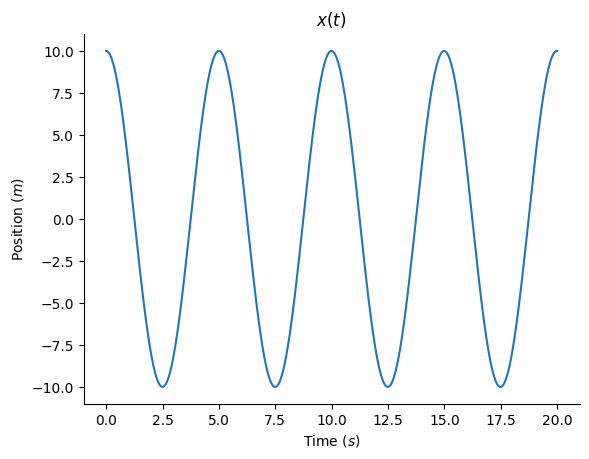

In [7]:
# Gráfica x(t)

plt.title('$x(t)$')
plt.xlabel('Time ($s$)')
plt.ylabel('Position ($m$)')

sns.despine()
sns.lineplot(
    data = df_data, x='time', y='position'
)

<Axes: title={'center': '$v_x(t)$'}, xlabel='Time ($s$)', ylabel='Velocity ($m/s$)'>

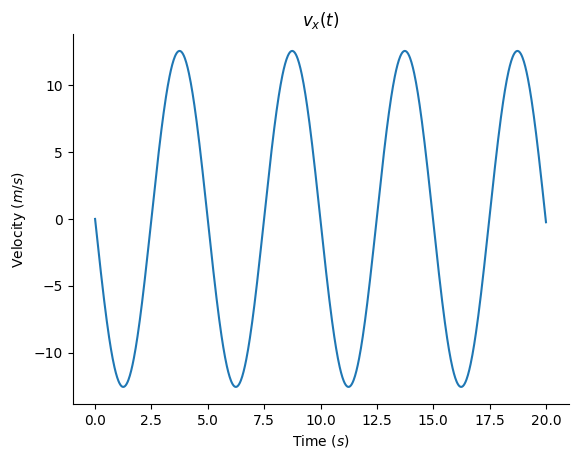

In [8]:
# Gráfica v(t)

plt.title('$v_x(t)$')
plt.xlabel('Time ($s$)')
plt.ylabel('Velocity ($m/s$)')

sns.despine()
sns.lineplot(
    data = df_data, x='time', y='velocity'
)

<Axes: title={'center': '$a(t)$'}, xlabel='Time ($s$)', ylabel='Acceleration ($m/s^2$)'>

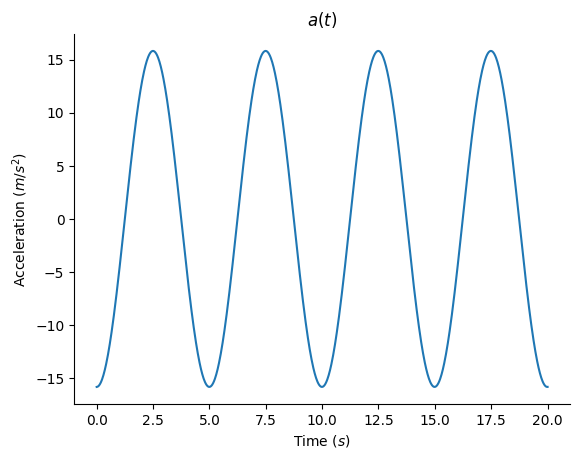

In [9]:
# Gráfica a(t)

plt.title('$a(t)$')
plt.xlabel('Time ($s$)')
plt.ylabel('Acceleration ($m/s^2$)')

sns.despine()
sns.lineplot(
    data = df_data, x='time', y='acceleration'
)

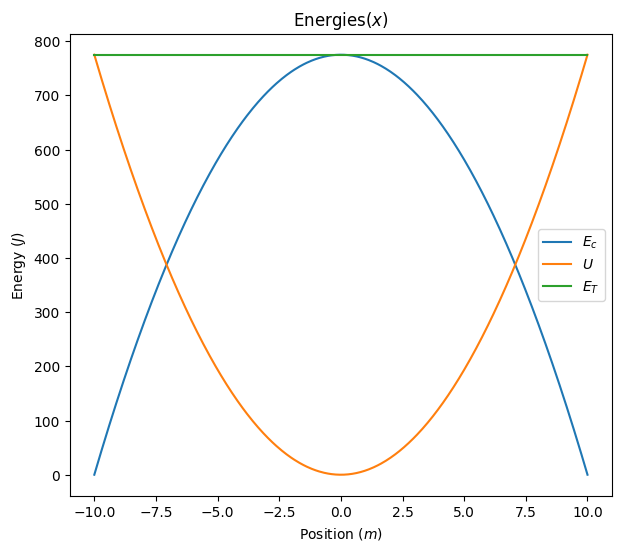

In [6]:
# Gráficas de todas las energías

plt.subplots(figsize=(7, 6))

plt.title('Energies($x$)')
plt.xlabel('Position ($m$)')
plt.ylabel('Energy ($J$)')

sns.lineplot(
    data = df_data, x='position', y='kinetic',
    label = '$E_c$'
)

sns.lineplot(
    data = df_data, x='position', y='potential',
    label = '$U$'
)

sns.lineplot(
    data = df_data, x='position', y='mechanical',
    label = '$E_T$'
)

plt.legend(loc=7)

<Axes: title={'center': 'Kinetic energy($t$)'}, xlabel='Time ($s$)', ylabel='Energy ($J$)'>

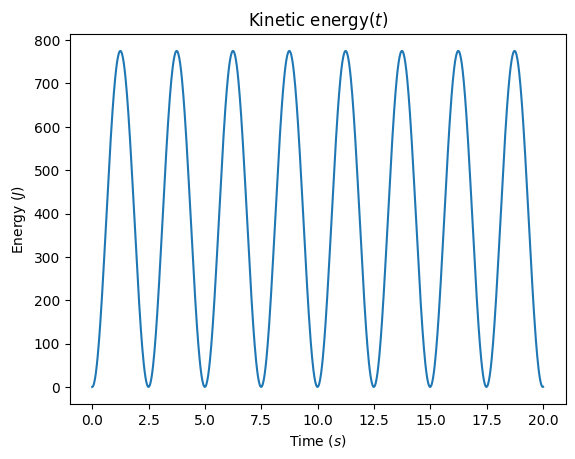

In [10]:
# Gráficas de la energía cinetica y potencial con respecto al tiempo

plt.title('Kinetic energy($t$)')
plt.xlabel('Time ($s$)')
plt.ylabel('Energy ($J$)')

sns.lineplot(
    data = df_data, x='time', y='kinetic'
)

<Axes: title={'center': 'Potential energy($t$)'}, xlabel='Time ($s$)', ylabel='Energy ($J$)'>

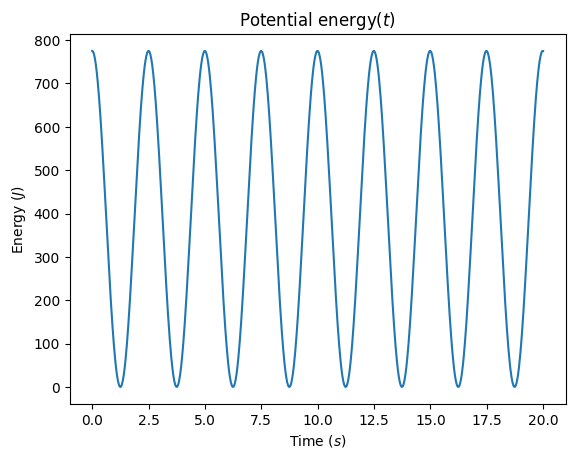

In [11]:
plt.title('Potential energy($t$)')
plt.xlabel('Time ($s$)')
plt.ylabel('Energy ($J$)')

sns.lineplot(
    data = df_data, x='time', y='potential'
)

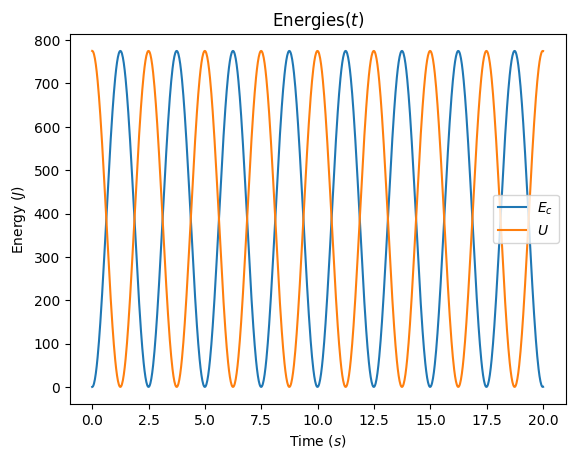

In [14]:
plt.title('Energies($t$)')
plt.xlabel('Time ($s$)')
plt.ylabel('Energy ($J$)')

sns.lineplot(
    data = df_data, x='time', y='kinetic',
    label = '$E_c$'
)

sns.lineplot(
    data = df_data, x='time', y='potential',
    label = '$U$'
)

plt.legend(loc=7)

C:\Users\perez\AppData\Local\Temp\ipykernel_4700\394612656.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, 1)


Primera linea: gráficas x(t), v(t) y a(t)
Segunda linea: gráficas Ec(x), todas las energías con respecto a x y U(x)
Tercera linea: gráficas Ec(t), todas las energías con respecto a t y U(t)


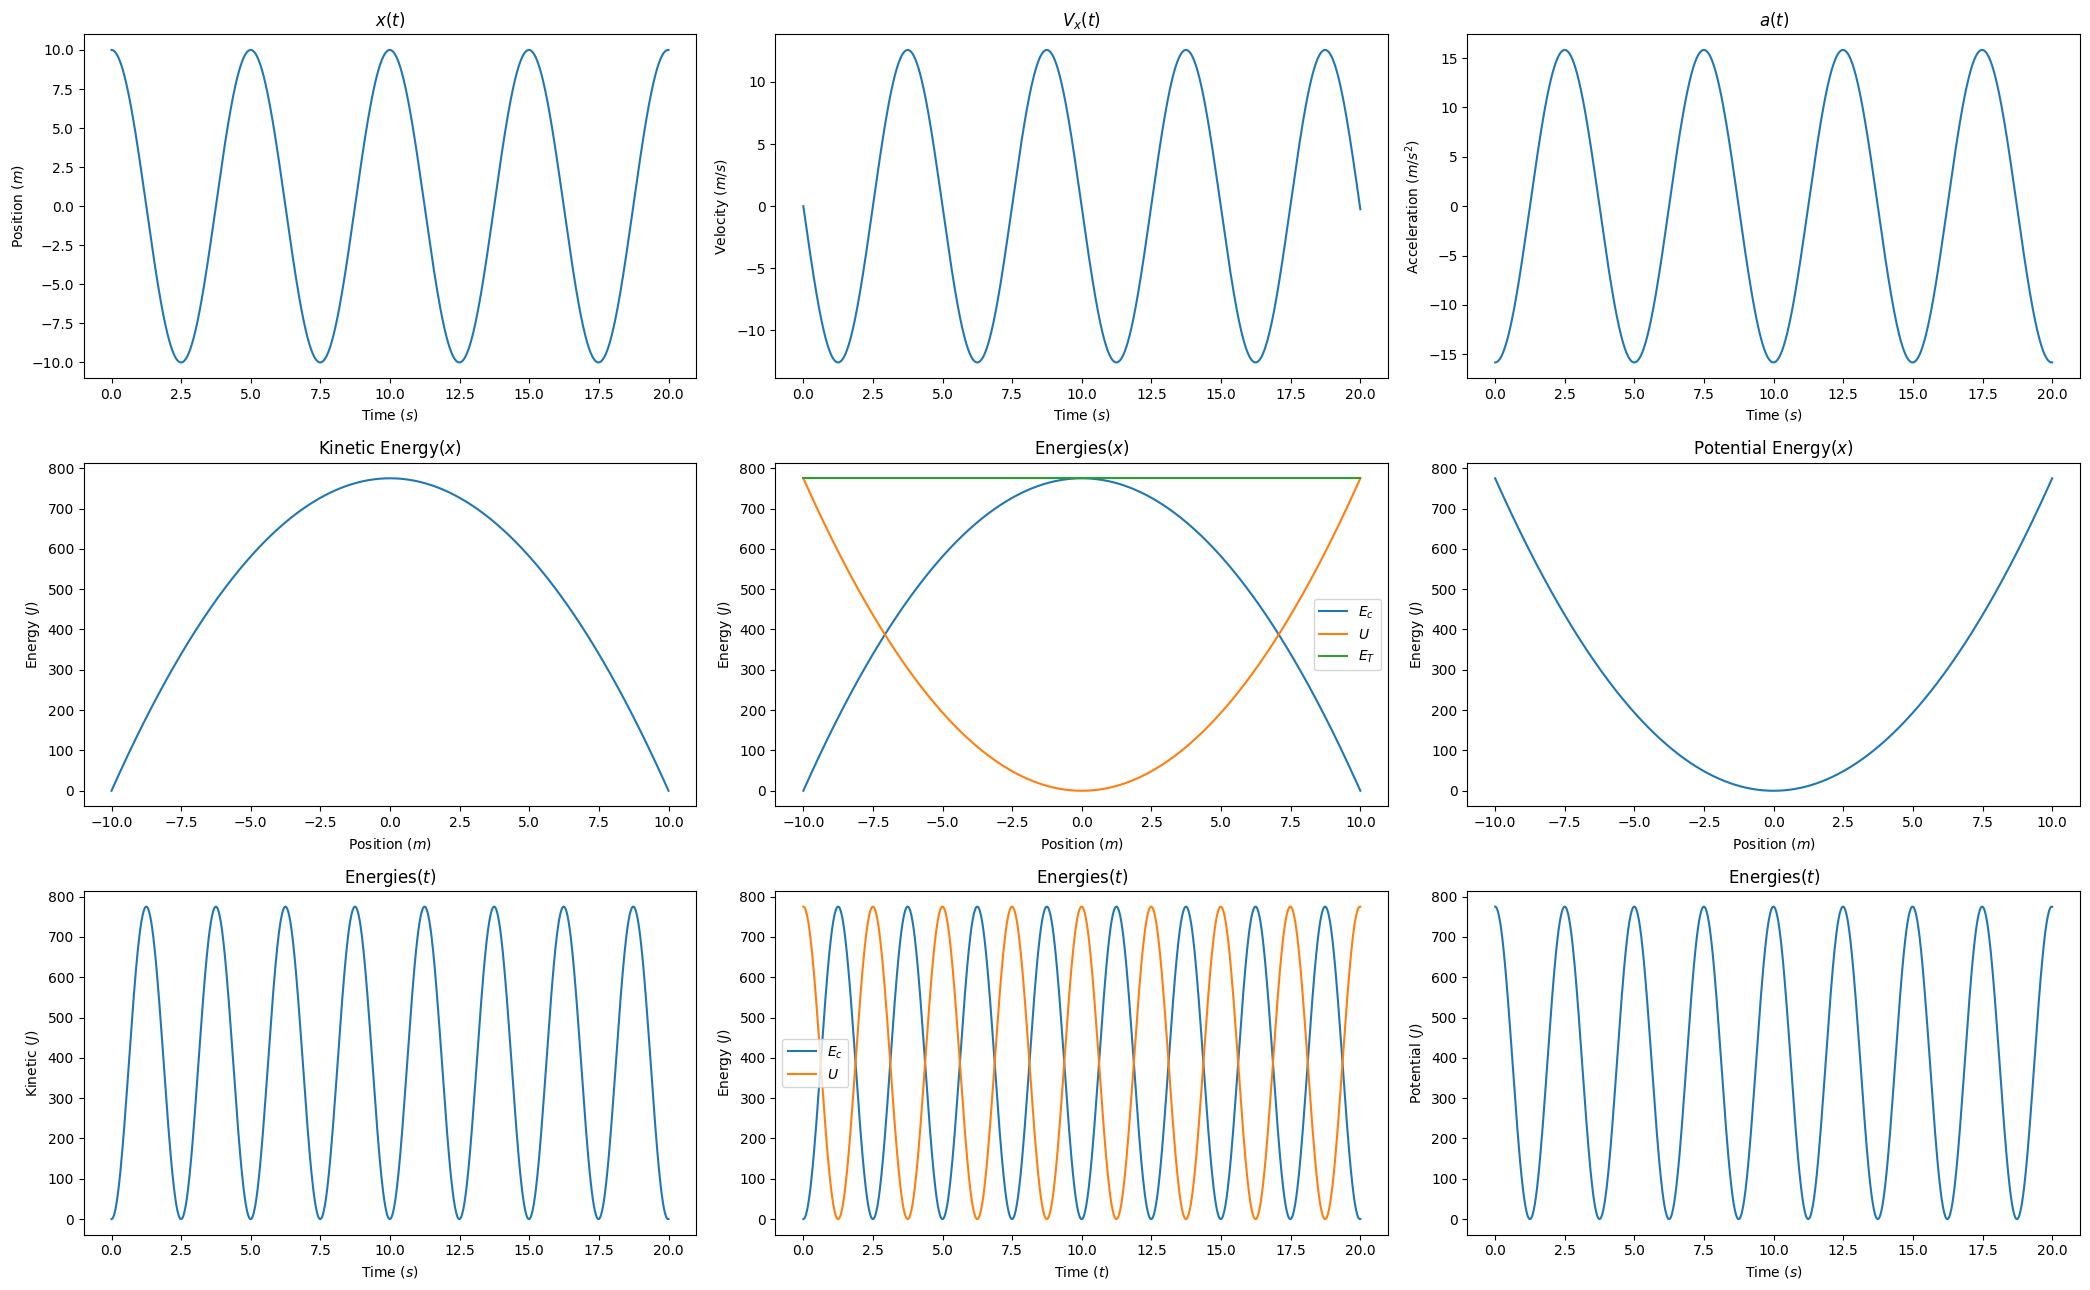

In [15]:
# Hacer todas las gráficas en una sola

plt.subplots(figsize=(21, 13))

# Gráfica X(t)
plt.subplot(3, 3, 1)

plt.title('$x(t)$')
plt.xlabel('Time ($s$)')
plt.ylabel('Position ($m$)')

sns.lineplot(
    data = df_data, x='time', y='position'
)

# Gráfica V(t)
plt.subplot(3, 3, 2)

plt.title('$V_x(t)$')
plt.xlabel('Time ($s$)')
plt.ylabel('Velocity ($m/s$)')

sns.lineplot(
    data = df_data, x = 'time', y = 'velocity'
)

# Gráfica a(t)
plt.subplot(3, 3, 3)

plt.title('$a(t)$')
plt.xlabel('Time ($s$)')
plt.ylabel('Acceleration ($m/s^2$)')

sns.lineplot(
    data=df_data, x='time', y='acceleration'
)

print('Primera linea: gráficas x(t), v(t) y a(t)')


plt.subplot(3, 3, 4)

plt.title('Kinetic Energy($x$)')
plt.xlabel('Position ($m$)')
plt.ylabel('Energy ($J$)')

sns.lineplot(
    data = df_data, x='position', y='kinetic'
)

# Gráfica de todas las energías
plt.subplot(3, 3, 5)

plt.title('Energies($x$)')
plt.xlabel('Position ($m$)')
plt.ylabel('Energy ($J$)')

sns.lineplot(
    data = df_data, x='position', y='kinetic',
    label = '$E_c$'
)

sns.lineplot(
    data = df_data, x='position', y='potential',
    label = '$U$'
)

sns.lineplot(
    data = df_data, x='position', y='mechanical',
    label = '$E_T$'
)

plt.legend(loc=7)

# Gráfica U(x)
plt.subplot(3, 3, 6)

plt.title('Potential Energy($x$)')
plt.xlabel('Position ($m$)')
plt.ylabel('Energy ($J$)')

sns.lineplot(
    data = df_data, x='position', y='potential'
)


print('Segunda linea: gráficas Ec(x), todas las energías con respecto a x y U(x)')


# Gráfica Ec(t)
plt.subplot(3, 3, 7)

plt.title('Energies($t$)')
plt.xlabel('Time ($s$)')
plt.ylabel('Kinetic ($J$)')

sns.lineplot(
    data = df_data, x='time', y='kinetic',
)

# Gráfica de todas las energías con respecto al tiempo
plt.subplot(3, 3, 8)

plt.title('Energies($t$)')
plt.xlabel('Time ($t$)')
plt.ylabel('Energy ($J$)')

sns.lineplot(
    data = df_data, x='time', y='kinetic',
    label = '$E_c$'
)

sns.lineplot(
    data = df_data, x='time', y='potential',
    label = '$U$'
)

# Gráfica U(t)
plt.subplot(3, 3, 9)

plt.title('Energies($t$)')
plt.xlabel('Time ($s$)')
plt.ylabel('Potential ($J$)')

sns.lineplot(
    data = df_data, x='time', y='potential',
)

plt.tight_layout()

print('Tercera linea: gráficas Ec(t), todas las energías con respecto a t y U(t)')